# 0.预处理
读取图片，转换色彩空间为HSV以便处理

In [73]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [47]:
boat = cv2.imread('boat.jpg')
boat_hsv = cv2.cvtColor(boat, cv2.COLOR_BGR2HSV)
# RGB 图像用来输出表示
boat_rgb = cv2.cvtColor(boat_hsv, cv2.COLOR_HSV2RGB)
# 分离 HSV 通道用来增强对比度
h, s, v = cv2.split(boat_hsv)

下图分别是某图低对比（左）度和该图高对比度（右）的直方图。
![low_and_high](low_and_high.jpg)
显然左边的像素值的变化范围比右边小，也就是左边的方差比右边的方差小<br>
而且对比度本质上是衡量图像中亮度变化的程度，所以这里使用像素方差作为这个指标。<br><br>
再写一个量化指标的函数来展示结果。

In [60]:
def calculate_variance(image):
    # 将图像转换为灰度图
    gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    return np.var(gray_image)

写一个用来展示对比对比度增强前后图像的函数

In [64]:
def show_img(new_boat):
    plt.figure(figsize=(12, 6))
    # 显示原图
    plt.subplot(1, 2, 1)
    plt.imshow(boat_rgb)
    plt.title('Original Image')
    plt.axis('off')
    plt.text(0.5, -0.1, f'variance: {calculate_variance(boat_rgb):.2f}', 
             ha='center', va='center', 
             transform=plt.gca().transAxes, 
             fontsize=12, color='black')
    # 显示新图
    plt.subplot(1, 2, 2)
    plt.imshow(new_boat)
    plt.title('New Image')
    plt.axis('off')
    plt.text(0.5, -0.1, f'variance: {calculate_variance(new_boat):.2f}', 
             ha='center', va='center', 
             transform=plt.gca().transAxes, 
             fontsize=12, color='black')

    plt.show()

# 1.CLAHE算法增强对比度

In [62]:
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))

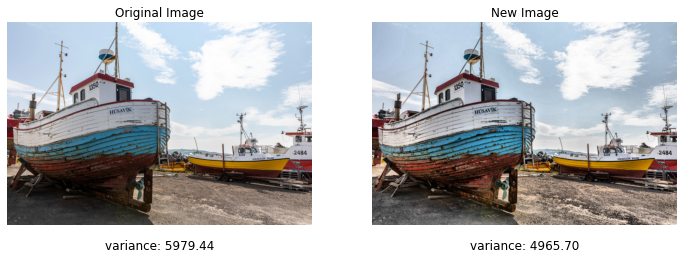

In [66]:
v_clahe = clahe.apply(v)
# 合并通道
hsv_clahe = cv2.merge([h, s, v_clahe])
boat_rgb_clahe = cv2.cvtColor(hsv_clahe, cv2.COLOR_HSV2RGB)
show_img(boat_rgb_clahe)

# 2.直方图均衡化

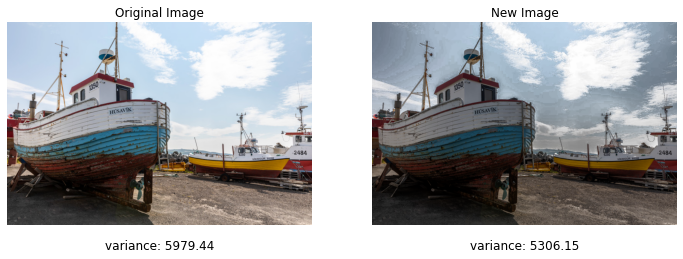

In [70]:
# 计算直方图
hist, bins = np.histogram(v.flatten(), 256, [0,256])

# 计算累积直方图
cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()

# 构建累积直方图的映射表
cdf_m = np.ma.masked_equal(cdf, 0)
cdf_m = (cdf_m - cdf_m.min()) * 255 / (cdf_m.max() - cdf_m.min())
cdf = np.ma.filled(cdf_m, 0).astype('uint8')

# 应用直方图均衡化
v_2 = cdf[v]
hsv_2 = cv2.merge([h, s, v_2])
boat_rgb_2 = cv2.cvtColor(hsv_2, cv2.COLOR_HSV2RGB)
show_img(boat_rgb_2)

# 3.缩放直方图的范围

先画该图的直方图看看长什么样

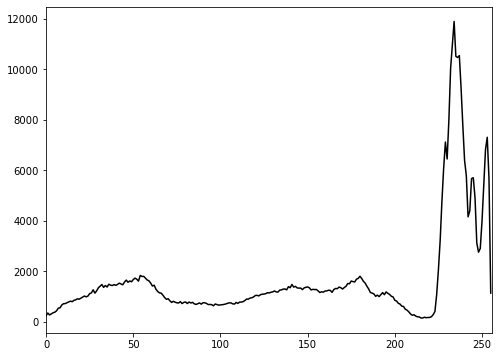

In [83]:
v_hist = cv2.calcHist([v], [0], None, [256], [0, 256])
plt.figure(figsize=(8, 6))
plt.plot(v_hist, color='black')
plt.xlim([0, 256])
plt.show()

In [98]:
# 归一化 V 通道并缩放
v_norm = (v - v.min()) / (v.max() - v.min())
v_3 = 50 + (255 - 50) * v_norm
v_3 = v_3.astype(np.uint8)

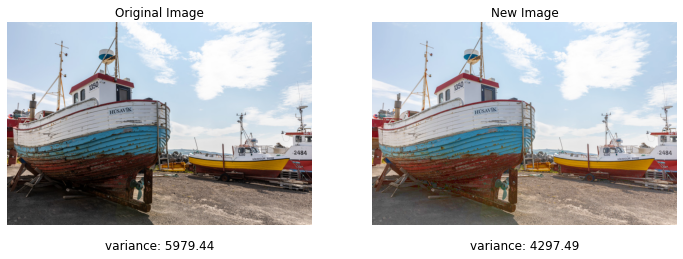

In [99]:
hsv_3 = cv2.merge([h, s, v_3])
boat_rgb_3 = cv2.cvtColor(hsv_3, cv2.COLOR_HSV2RGB)
show_img(boat_rgb_3)